## Introduction to Time Series ("ts")
christopher.overton@galvanize.com  
2016.12.22

## Objectives

* Understand time series within the larger context of forecasting
* BY TODAY, YOU SHOULD BE ABLE TO FORECAST SINGLE VARIABLE TIME SERIES, using your choice of exponential smoothing or ARIMA.
* Understand how time series compares to other data science tasks  
    - In particular, understand how forecast errors "fan out" over time
* Define key time series concepts  

* Algorithmic & software techniques:
    - Understand and implement exponential smoothing (ETS) models    
      
    - Understand whether and how often to difference time series to approach stability
    - Understand AR and MA, and their relation to PACF (partial autocorrelation) and ACF (autocorrelation)
    - Use Box-Jenkins work-flow to build an ARIMA model

* Software:
    - Use graphical tools to analyze time series data
    - Train and evaluate ARIMA models using StatsModels

## Agenda

Morning:
* Understand time series ("ts") within the larger context of forecasting
* How does this compare to other data science tasks?  
* Exponential smoothing - a less structured approach akin to Bayesian updating



Afternoon:
* Key time series concepts and properties
* Intro to structured ts models: ARIMA - concepts & terminology
* More ARIMA: the full Box-Jenkins workflow
* Practical advice        
* Pointer to useful topics we did not manage to cover in one day

## References

A couple helpful references, in order of difficulty

*   Hyndman & Athanasopoulos: [Forecasting: principles and practice (free online, last published '12)](https://www.otexts.org/fpp)  
Excellent introduction, very readable; contains good R code
*   Shumway & Stoffer: [Time Series & Applications: w. R Examples (4th ed out early in '17?)](http://www.stat.pitt.edu/stoffer/tsa4/index.html)   
Enough material for whole year masters course. First chapters included in our readings
*   Box, Jenkins: [Time Series Analysis: forecasting and Control ('08)](https://www.amazon.com/Time-Analysis-Forecasting-Probability-Statistics/dp/1118675029)    
Recent update edition by originators named by famous methodology.  
Includes older focus on process control, which is often overlooked in recent emphasis of finance  
*   Hamilton: [Time Series Analysis ('94)](http://press.princeton.edu/titles/5386.html)  
Older and huge, but a classic

### Specialization to economics/finance
*   Tsay [Analysis of Financial Time Series ('10)](https://www.amazon.com/Analysis-Financial-Time-Ruey-Tsay/dp/0470414359)  
Solid mathy introduction by a leading contributor, with good R code
*   Tsay [Introduction to Analysis of Financial Data ('12)](https://www.amazon.com/Introduction-Analysis-Financial-Data/dp/0470890819)  
More advanced text with more frmulas and less code
*   Enders: [Applied Econometric Time Series](http://www.wiley.com/WileyCDA/WileyTitle/productCd-EHEP003218.html)
*   Elliott & Timmermann: [Economic forecasting](http://press.princeton.edu/titles/10740.html)

### Notes, credits:
* Latst revision of these lectures: cover exponential smoothing before ARIMA and to integrate with "breakout" sessions emphasising trickier concepts.
* These lectures were adapted most recently from Ben Skrainka
* Some illustrations come from references Hyndman & Athanasopoulos and Shumway & Stoffer
* [In a separate notebook] we adapt the implementation of exponential smoothing by Grisha Trubetskoy, who also provides very helpful explanations at three web pages, starting with:    
https://grisha.org/blog/2016/01/29/triple-exponential-smoothing-forecasting/  

### A little religion: Python vs. R

In most cases, you can use Python or R, depending on your preference:

* For time series, python still lags behind R, as was more the case for regression before recent evolution in scikit.learn
    -  Use Pandas (or such tools as Spark DataFrames to manipulate data and dates
    -  Use [StatsModels](http://statsmodels.sourceforge.net/devel/tsa.html) for core time series models (mainly ARIMA family of models - nothing polished for exponential smoothing)
    -  As Python becomes more of a de facto standard, it should catch up in ts as well (as is occurring in StatsModels)
* Currently, R is far the better option for ts, and is used by most researchers and textbooks  
    - Hyndman's `forecast` package is outstanding
*   Galvanize is a Python shop, so ... we will use Python
    - However, our gU master's program covers this content using R
    - If you are serious about time series and forecasting, use R where appropriate

## Introduction: whiteboard example
* What is a time series?
    - Discrete events vs. counts
    - Need enough of them to achieve statistical power
* Time series vs. regression  
    - Use richer time structure
    - Points of interest are "outliers" (as seen from the view of regression)
    - Value of data decays with time -> intuition behind exponential smoothing

## Fanout of prediction intervals
For the following quarterly forecast (blue line), the gray area marks "confidence intervals" over time.

<img src='images/predict.jpg', width=500px></img>

##   Time series data

Time series data is a sequence over time of observations of some quantity of interest, such as:

* GDP
* The price over time of toilet paper or of a stock
* Demand for a good
* Unemployment rate
* Web traffic (clicks, logins, posts, etc.)

##   Definition

We assume a time series, $\left\{y_t \right\}$, has the following properties:

*   $y_t$ is an observation of the level of $y$ at time $t$
*   $\left\{y_t \right\}$ is time series, i.e., the collection of observations:
    -   May extend back to $t = 0$ or $t = -\infty$, depending on the problem.
    -   E.g., $t \in \left\{0, ..., T\right\}$
*   Starting after time t, we typically want to forecast y out to a "**horizon**" h, namely forecasting values $y_{t+1}, y_{t+2}, ... y_{t+h}$.  
To emphasize our knowledge of y up to time t, this can be written as $y_{t+1|t}, y_{t+2|t}, ... y_{t+h|t}$  
This is the same notation as conditional probability (with the same meaning.)

##  Assumptions

*   Discrete time:
    -   Sampling at regular intervals
    -   ... even if process is continuous
*   Evenly spaced observations
*   No missing observations

## Caveat: a time series is only one realization (within an assumed model)

Time series are hard to model because we only observe one realization of the path of the process:

*   Often have limited data
*   Must impose structure -- such as assumptions about correlation -- in order to model
*   Must project beyond support of the data.

##  Components of a time series

Think of a time series as consisting of several different components:

*   **Trend**
*   **Seasonal**
*   "**Cyclic**" - fluctuations over multiple steps that are not periodic (at a specified seasonality)
*   Everything else is "noise", but we want it as much as possible to be "**white noise**": without a discernable structure and typically normally distributed

Can be additive or multiplicative

##  Example decomposition from Hyndman et al.
Electrical equipment orders and time series components

<img alt='<picture>' src='images/hyndman_decomp.png' width=500px />

##  Example time series from Hyndman et al.


<img alt='<picture>' src='images/hyndman.png' width=600px />

## Two popular models

*   Exponential smoothing (ETS):
    -   Smooths out irregular shocks to model trend and seasonality
    -   Updates forecast with linear combination of past forecast and current value
    -   An example of a "state space model"  
    
*   Models from the ARIMA family, strting wtih ARIMA(p,d,q):
    -   A benchmark model
    -   Captures key structural aspects of time series data

# Exponential smoothing (ETS) models

##   ETS: introduction

Exponential smoothing models are a benchmark model:

*   Robust performance
*   Easy to explain to non-technical stakeholders
*   Easy to estimate with limited computational resources
*   Forecast well because of parsimony

## Basic idea of exponential smoothing
In "simple exponential smoothing" ("SES"):  

$$\hat{y}_{t+1|t} = \alpha y_t +(1 - \alpha) \hat{y}_{t|t−1}$$  

This means: $$\hat{y}_{t+1|t} = \alpha y_t +(1 - \alpha)\alpha y_{t-1} + (1 - \alpha)^2 \hat{y}_{t-1|t−2}$$  
$$...$$  
$$= \alpha y_t +(1 - \alpha)\alpha y_{t-1} + (1 - \alpha)^2\alpha y_{t-2} + (1 - \alpha)^3\alpha y_{t-3} + ... $$

A given term $y_t$ affects all subsequent values $y_{t+i}$, but this contribution decreases as i increases.
   - Specifically, this weight decays exponentially in powers of $(1 - \alpha)$ - hence the word 'exponential'

Terms far enough back in history have a negligible effect on the current estimate.

The "smoothing parameter" $\alpha$ determines how much weight comes from immediately preceding term  

So a series with higher $\alpha$:  
1) is noisier   
2) updates more quickly

### Oberve how exponential smoothing of the original series (in black) varies according to the $\alpha$ parameter

<img alt='simple exponential smoothing' src='images/ses.png' width=600px></img>

## Coding the ETS model

Python provides partial support for ETS (see Panda's `pandas.stats.moments.ewma`)

However, the algorithm is simple enough that we use a simple implementation for additive models adapted from the web.  
(==>Cut over to exponential smoothing demo.)  

For bigger applications it is better to use R's `ets` function in the `forecast` package

## The ETS model

This model has separate smoothing equations for:

*   A forecast 'Level' (which some authors associate with the 'E' in 'ETS')
*   Trend (optional "T")
*   Seasonality (optional "S")

Each of these can be either additive or multiplicative.  

Although the main goal is to model and predict $y_t$, ETS models a 'state space' of these hidden variables

## Example: simple exponential smoothing -- ETS (ANN)

[Notice the model desciption 'ANN' at teh end of the title - we'll get back to that in a moment.]

Simple exponential smoothing updates forecast based on latest realization of $y_t$:

*   Forecast equation:  $\hat{y}_{t+1|t} = \ell_t$
*   Level equation: $\ell_t = \alpha \cdot y_t + (1-\alpha) \cdot \ell_{t-1}$

If $y_t = \hat{y}_{t|t-1} + \epsilon_t$, can use *error correction* formulation:

*   $y_t = \ell_{t-1} + \epsilon_t$
*   $\ell_t = \ell_{t-1} + \alpha \cdot \epsilon_t$  

In this simplest of the ETS models, the underlying "state" is $\ell_t$.   It is "smoothed" (less noisy) than $y_t$ by the proportion $\alpha$

## Example: Holt's linear model ("double exponential smoothing") -- ETS (AAN)

ETS(AAN) adds slope to the model to better handle a trend:

*   Forecast equation:  $\hat{y}_{t+h|t} = \ell_t + h \cdot b_t$
*   Level equation: $\ell_t = \alpha \cdot y_t + (1-\alpha) \cdot (\ell_{t-1} + b_{t-1})$
*   Trend equation: $b_t = \beta^* \cdot (\ell_t - \ell_{t-1}) + (1 - \beta^* ) \cdot b_{t-1}$

Notes:
* Modeling the trend is similar to differencing (the "I" part of ARIMA)
* Here the state consists of two variables, level (as before) and trend (default incremental change)
* Each of these two state variables is an exponentially smoothed series with its own decay parameter

## Example: The gory details for additive Holt-Winters, including seasonality -- ETS (AAA)
The following addition is due to Winters - one extra equation, with new terms for forecast and level: 
*   Forecast equation:  $\hat{y}_{t+h|t} = \ell_t + h \cdot b_t + s_{t-m+h^+}$
*   Level equation: $\ell_t = \alpha \cdot (y_t - s_{t-m}) + (1-\alpha) \cdot (\ell_{t-1} + b_{t-1})$
*   Trend equation: $b_t = \beta^* \cdot (\ell_t - \ell_{t-1}) + (1 - \beta^* ) \cdot b_{t-1}$
*   Seasonality equation: $s_t = \gamma \cdot (y_t - \ell_{t-1} - b_{t-1}) + (1-\gamma) \cdot s_{t-m}$

Interestingly, this model develops state for each of the m possible seasonalities, but at the cost of only one new exponential decay parameter $\gamma$  
Here, $h^+$ is 1 + the "floor" of (greatest integer not exceeding) $(h-1)$ mod $m$, which takes the latest available seasonality from the training set  

## Alternate forms for each of the E, T, and S components

In the last example, all formulas above use additive effects (hence the "A"'s), but could be changed to be multiplicative (which would be labeled "M) 

Also, either additive or multiplicative components can be exponentially decayed ("damped") to revert over time to neutral values: 0 if additive, and 1 if multiplicative. These are written $A_d$ and $M_d$

For both of these, see the references (e.g. Hyndman) for formulas

## Hyndman's taxonomy

Hyndman categorizes exponential smoothing models as ETS:

*   *E* for type of error
*   *T* for type of trend
*   *S* for type of seasonality

For each of these parts of the ts, one may choose the following types of smoothing:

*   *A* for additive
*   *M* for multiplicative
*   *N* for none
*   *$A_d$* for additive damped
*   *$M_d$* for multiplicative damped

The three preceeding examples combine varying "A" and "N" components (indicated in slide headings)

How would we set up a smoothing model for "Autralian electricity production" example?

<img alt='Australian electricity' src='images/AustralianElectricity.png' width=500px></img>

One good possibility: ETS(MMM)

## Exponential smoothing (ETS): key takeaways

Exponential smoothing is simple enough that you could implement it yourself and explain it to your boss.

It is 'robust' in the sense that 1) prior errors in forecasting step up the pace of correction, and 2) trend and level help correct each other, and help cover each other's mistakes.

You can tune how each of the structural components are built, allowing you to build enough modeling flexibility to capture a wide variety of ts behaviors, including nonlinear ones.

Compared to regression, ETS 1) is more numerically stable (i.e. less extreme in the far future), and 2) pays more attention to the most important predictors, namely the more recent past.

However 'with choice comes responsibility': you if your decay parameters are too big, you 'forget the past' too quickly; if they are too small, the effect of noise or one-off events can linger longer than reasonable.

# Afternoon lecture: ARIMA

## Agenda

Morning:
* Understand time series ("ts") within the larger context of forecasting
* How does this compare to other data science tasks?  
* Exponential smoothing - a less structured approach akin to Bayesian updating



Afternoon:
* Key time series concepts and properties
* Intro to structured ts models: ARIMA - concepts & terminology
* More ARIMA: the full Box-Jenkins workflow
* Practical advice        
* Pointer to useful topics we did not manage to cover in one day

# Terminology and basic definitions

##  Notation

Some notation, following Hyndman:

*   $y_t$: the level of some value of interest at time $t$
*   $\epsilon_t$: the value of a 'shock' (or 'innovation'), $\epsilon$, at time $t$
*   $\hat{y}_{t+h|t}$ is the forecast for $y_{t+h}$ based on the information available at time $t$

##  Lags

Often, models use past values to predict future:

*   AR(1): $y_t = \phi \cdot y_{t-1} + \epsilon_t$
*   MA(1): $y_t = \mu + \epsilon_t + \psi \cdot \epsilon_{t-1}$
*   This is easier to write with lag operators:  
$\mathbb{L} : x_t \mapsto x_{t-1}$
*   With lag operators:
    -   AR(1): $y_t = \phi \cdot \mathbb{L} y_t + \epsilon_t$
    -   MA(1): $y_t = \mu + (1 + \psi \cdot \mathbb{L}) \epsilon_{t}$

##  Concepts from basic statistics

First, we review some basic statistics:

*   *expectation*:
    -   $\mathbb{E} [g(x)] \equiv \int{g(x) \cdot f(x) dx}$ or: $\frac{\Sigma_{x = 1}^N g(x) \cdot f(x)}{N}$
    -   $g(x)$ is an arbitrary function
    -   $f(x)$ is the probability density function  
    -   For time series, time t is usually the variable over which expectation is generated
*	*mean*:
    -   A 'typical' value
    -   $\mu(x_t) = \mathbb{E} [x_t]$   
*   *variance*:
    -   A measure of volatility or the spread of a distribution
    -   $\mathtt{Var}(x_t) = \mathbb{E}[(x_t - \mu(x_t)) * (x_t - \mu(x_t))^T]$
    -   $\sigma^2(x_t) \equiv \mathtt{Var}(x_t)$
*   *standard deviation*:
    -   $\sigma(x_t) \equiv \sqrt{\mathtt{Var}(x_t)}$

## Concepts: time series (1/3)

To understand persistence of a time series, examine:

*	*autocovariance*:
    -   How much a lag predicts a future value of a time series
    -	$\mathtt{acov}(x_t,x_{t-h}) \equiv \mathbb{E} [(x_t - \mu(x_t)) * (x_{t-h} - \mu(x_{t-h})))]$
    -   Often written as $\gamma(s,t)$ or $\gamma(h)$ where $h = s-t$
*	*autocorrelation*:
    -	A dimensionless measure of the influence of one lag upon another
    -   Helps determine which ARIMA model to use  
    $\mathtt{acorr}(x_t, h) = \dfrac{ \mathtt{acov}(x_t, x_{t+h}) } { \sigma(x_t) \cdot \sigma(x_{t+h}) }$   
    -   Often written as $\rho(t) \equiv \gamma(t) / \gamma(0)$ for this case $y_t = y_{t-1} + \mu + \epsilon_t$   

## Concepts: time series (2/3)

==> Whiteboard example of **autocovariance** and **autocorrelation**

[This is akin to a 'convolution' as one would use in Fourier analysis: you are sort of convolving the series with itself]

==> Simple example: [1,2,3,2,1,2,3,2,1]

## Concepts: time series (3/3)
Special time series (easier to forecast):
* To forecast, you prefer mean, variance, and correlation to be stable over time
* strictly stationary:  
  For probability density $f(\cdot)$, ${x_t}$ is **strictly stationary** means $f(x_1,...,x_t)=f(x_{1+h},...,x_{t+h}),\forall h$
* **weakly stationary**: 
  - mean is constant for all periods: $\mu(x_t) = \mu(x_{t+h}), \forall h$
  - autocorrelation $\rho(s,t)$, depends only on |s - t| 
* white noise:
  - $acov(x_t , x_{t+h}) = var(x_t)$ if h = 0 and 0 otherwise
  - is (weakly) stationary
  - white noise is a key building block of time series models

## Differencing:
*   $d$ is how many times you must difference the series so that it is stationary
*   Usually, $d \in \left\{0, 1, 2\right\}$
*   Differencing should remove the trend component - at least mostly
*   Example: random walk (with drift)
*   Compute differences with `np.diff(n=d)` or  `pd.Series.diff(periods=d)` to turn ARIMA into ARMA.  

==> Whiteboard example of **differencing**

The 'I' in ARIMA stands for 'integrated'.  
Integration is roughly an inverse operation to differentiation. That's what the fundamental theorem of calculus says.   
In this case, we are dealing with discrete data, so we difference instead of differentiate, and integration instead becomes a finite sum.

#  ARIMA models

An ARIMA(p,d,q) is a general model which includes AR, I, and MA:

*   AR(p):  AR of order p
*   I(d):   I of order differencing d
*   MA(q):  MA of order q

Remarks:

*   AR, I, and/or MA may be missing from a general ARIMA model
*   If $d = 0 \Rightarrow$ ARIMA is called ARMA

#   Estimating ARIMA models using Box-Jenkins


## Main Box-Jenkins methodology

1.	Exploratory data analysis (EDA):
    -   plot time series, ACF, PACF
    -   identify hypotheses, models, and data issues
    -   aggregate to an appropriate grain
2.	Fit model(s)
    -	Difference until stationary (possibly at different seasonalities!)
    -   Test for a unit root (Augmented Dicky-Fuller (ADF)): if found, is evidence data still has trend
    -   However: too much differencing causes other problems
    -	Transform until variance is stable
3.	Examine residuals: are they white noise?
4.	Test and evaluate on out of sample data
5.	Worry about:
    -	structural breaks
    -	forecasting for large h with limited data $\Rightarrow$ need a "panel of experts"
    -	seasonality, periodicity

##  Modeling flow chart from Hyndman et al.

<img alt='<hyndman flow chart>', src='images/hyndman_modeling_process.png' width=500px>

New concepts in diagram above:  
- Box-Cox transform: $x \rightarrow (x^\lambda - 1)/\lambda$ for a choice of $\lambda$ that makes data more nomally distributed (but careful: this makes intuition harder!)
- A portmanteau test refers to statistical machinery to rule out a null hypothesis. For time series, one such is the Lyung-Box test, which decides whether to reject the null hypothesis that a whole set of autocorrelations (as opposed to just one of them) shows no significant structure

## Graphical tools

Plot data to develop understanding of data and possible models:

*   Key diagnostic plots:
    -   Plot time series, $y_t$, vs $t$
    -   Plot autocorrelation function (ACF), i.e., $\rho(h)$ vs. $h$
    -   Plot partial autocorrelation function (PACF)
*   Repeat for first and second differences, if needed to remove trend:
    -   Compute differences with `np.diff(n=d)` or  `pd.Series.diff(periods=d)`
    -   Transform series, if necessary, e.g, $y_t \rightarrow \log(y_t)$
    -   Check stationarity: i.e., no trend and constant variance

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
# from sklearn import datasets
%matplotlib inline
#sm.__version__

## A random sample

In [4]:
#Sample just with ar terms
dataAr = sm.tsa.arma_generate_sample(ar=[1, 0.7, 0.0, 0.3], 
                                     ma=[1], nsample=100)
#Sample just with ma terms
dataMa = sm.tsa.arma_generate_sample(ar=[1], 
                                     ma=[1, 0.4, -0.3], nsample=100)
#More confusing sample that mixes both kinds of effects
data = sm.tsa.arma_generate_sample(ar=[1, 0.7, 0.0, 0.3], 
                                   ma=[1,0.4, -0.3], nsample=100)

##  Autocorrelation function (ACF)

Shows likely order of the *MA(q)* part of the ARIMA(p,d,q) model:

*   Plots $\rho(h)$ vs. lags $h$, **so 'x-axis' is no longer time t!**
*   Find largest significant spike outside of significance bands
*   Consider order *q*, where  q is largest significant lag

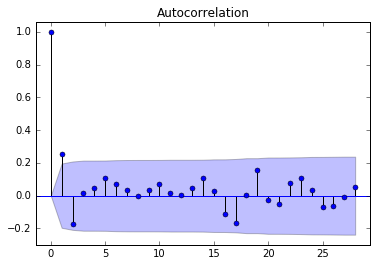

In [5]:
#Autocorrelations mostly die for sample created only using ma
sm.graphics.tsa.plot_acf(dataMa, lags=28, alpha=0.05)
plt.show()

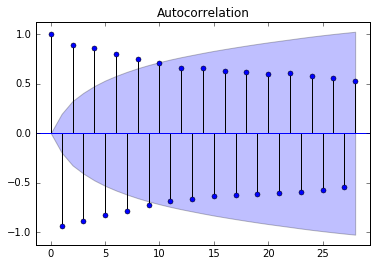

In [6]:
#Yikes! Autocorrelations decay slowly for sample created using ar
sm.graphics.tsa.plot_acf(dataAr, lags=28, alpha=0.05)
plt.show()

##  Partial autocorrelation function (PACF)

Shows likely order of the *AR(p)* part of the ARIMA(p,d,q) model:

*   Plots partial autocorrelation vs. lags $h$. Again, "x-axis" is not time t.
*   Partial autocorrelation uses a regression method to compute effect of just a single lag h that is not explained by lages 1, 2, 3, ... (h-1). By contrast, ACF at lag h may include effects that are also explainable by intrmediate lags 
*   Consider order *p*, where p = largest significant lag

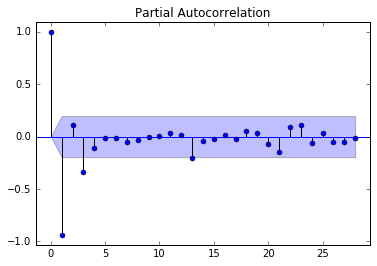

In [7]:
#Partial autocorrelation (PACF) falls quickly within 'noise' band when data buily only using ar.
sm.graphics.tsa.plot_pacf(dataAr, lags=28, alpha=0.05)
plt.show()

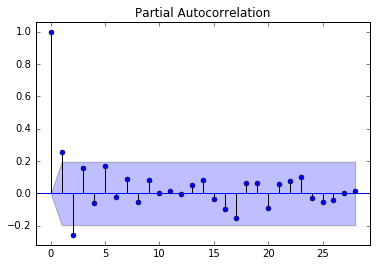

In [8]:
#PACF endures for many lags for data created with ma.
sm.graphics.tsa.plot_pacf(dataMa, lags=28, alpha=0.05)
plt.show()

# Diagnostic plots

## Example: plotting series, ACF, and PACF (1/3)

You will do this all the time, so create a helper function:

In [9]:
def ts_diag_plot(data, lags=28):
    fig = plt.figure(figsize=(15,10))
    ax1 = fig.add_subplot(311)
    ax1.plot(data)
    ax1.set_title('y_t vs. t')
    ax2 = fig.add_subplot(312)
    sm.graphics.tsa.plot_acf(data, lags=lags, ax=ax2)
    ax3 = fig.add_subplot(313)
    sm.graphics.tsa.plot_pacf(data, lags=lags, ax=ax3)
    fig.show()
    return fig

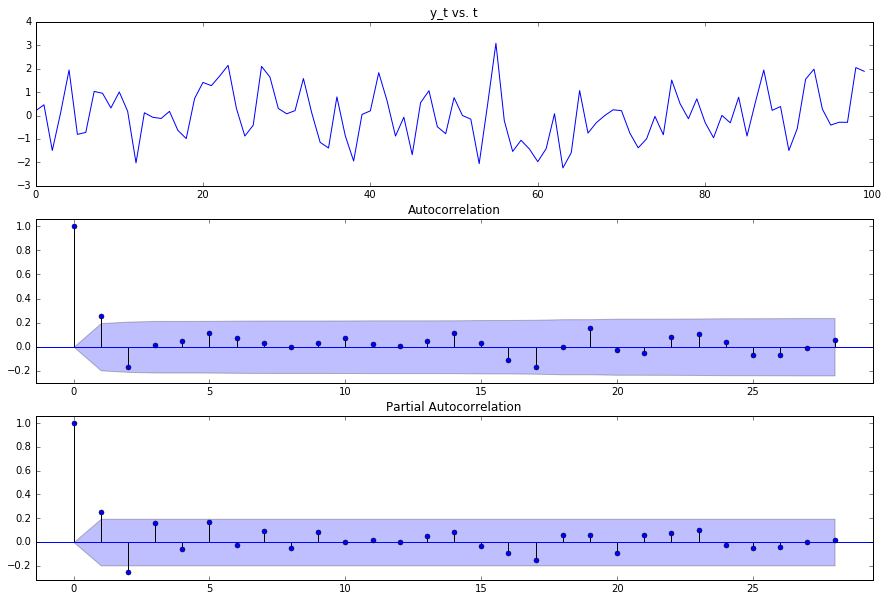

In [31]:
#from tsplot import ts_diag_plot
fake = dataMa #has ar as well as ma as shown below
#fake = sm.tsa.arma_generate_sample(ar=[1, 0.7, 0.0, 0.3],
#    ma=[0.2, -0.1], nsample=100)
fig = ts_diag_plot(fake)

## Example: diagnostic plots

<img alt='<Three diagnostic plots>' src='images/3plots.jpg' width=800px></img>

#   Practical advice


## Questions to ask

Look at the time series plots and ask:

*   Is it stationary?
*   Is there a trend?
*   Is the variance stable?
*   Are there seasonal or periodic components?
*   What AR and MA terms are likely present?
*   Are there structural breaks in the data?
*   Do I have enough data to forecast at horizon $h$?

## Stabilizing the time series

You need to stabilize the time series before estimating a model:

*   Transform data to stabilize variance:
    -   $y_t \leftarrow \log(y_t)$
    -   Verify via Box-Cox test
    -   Verify by plotting

*   Transform data so series is stationary:
    -   Compute first or second difference
    -   $y_t \leftarrow \Delta y_t$ or $y_t \leftarrow \Delta^2 y_t$
    -   Verify by portmanteau test


## Fit an ARIMA model (1/2)

To fit a model:

*   Split data into train set (earlier observations) and test set (later observations)  

*   To forecast at horizon $h$, should probably have at least $4 \times h$ observations to train plus $h$  observations to test:
    -   e.g., you cannot forecast demand two years out if you only have three months of history
    -   If these conditions are violated, you can try to substitute using a 'panel of experts'
    -   More data is better, especially if seasonality is present
    - **But**, the data pattern is more likely to have changed over a longer history, reducing the value of more distant past.

## Fit an ARIMA model (2/2)

*   To identify optimal parameters d, p, and q of model:
    -   Difference until stationary
    -   Number of differences is order $d$ for I(d)
    
    -   Examine ACF and PACF
    -   Use `sm.tsa.arma_order_select_ic` to generate and compare several models
    -   Validate using forecasts over different time periods (not quite as simple as cross validation)

## Example (1/2): automatic checking for enough differencing

In [14]:
data2 = sm.datasets.macrodata.load_pandas()
df = data2.data
df.index = pd.Index(
    sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
y = df.m1
X = df[['realgdp', 'cpi']] #"exogenous" predictors - namely outside of the time series we are trying to predict
# We try to use this in the second cell below.

In [39]:
#The error generated when order=[3,0,1] fails, indicating original series ws not stationary
model = sm.tsa.ARIMA(endog=y, order=[3,1,1])
# model = sm.tsa.ARIMA(endog=y, order=[3,0,1]) #fails, indicating original series ws not stationary
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.m1   No. Observations:                  202
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -755.980
Method:                       css-mle   S.D. of innovations             10.193
Date:                Thu, 22 Dec 2016   AIC                           1523.961
Time:                        14:37:22   BIC                           1543.810
Sample:                    06-30-1959   HQIC                          1531.992
                         - 09-30-2009                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          7.8679      2.509      3.136      0.002         2.951    12.785
ar.L1.D.m1    -0.4212      0.109     -3.871      0.000        -0.634    -0.208
ar.L2.D.m1     0.5756      0.082      7.000      0.000         0.414     0.737
ar.L3.D.m1     0.3304      0.074      4.462      0.000         0.185     0.476
ma.L1.D.m1     0.8341      0.092      9.035      0.000         0.653     1.015
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2429           -0.0000j            1.2429           -0.0000
AR.2           -1.4924           -0.4557j            1.5605           -0.4528
AR.3           -1.4924           +0.4557j            1.5605            0.4528
MA.1           -1.1989           +0.0000j            1.1989            0.5000
-----------------------------------------------------------------------------
"""

In [16]:
# Try to build a model including additional predictors (defined earlier): X = df[['realgdp', 'cpi']]
model2 = sm.tsa.ARIMA(endog=y, order=[3,1,1], exog=X)
results2 = model2.fit()
results2.summary()

/Users/christopher.overton/anaconda2/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D.m1   No. Observations:                  202
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -753.952
Method:                       css-mle   S.D. of innovations             10.094
Date:                Thu, 22 Dec 2016   AIC                           1523.904
Time:                        12:58:57   BIC                           1550.370
Sample:                    06-30-1959   HQIC                          1534.612
                         - 09-30-2009                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          5.3475      7.908      0.676      0.500       -10.152    20.847
realgdp       -0.0027      0.004     -0.719      0.473        -0.010     0.005
cpi            0.2103      0.199      1.056      0.292        -0.180     0.601
ar.L1.D.m1    -0.4505      0.111     -4.063      0.000        -0.668    -0.233
ar.L2.D.m1     0.5355      0.082      6.513      0.000         0.374     0.697
ar.L3.D.m1     0.3096      0.074      4.183      0.000         0.165     0.455
ma.L1.D.m1     0.8344      0.094      8.875      0.000         0.650     1.019
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3001           -0.0000j            1.3001           -0.0000
AR.2           -1.5149           -0.4351j            1.5761           -0.4555
AR.3           -1.5149           +0.4351j            1.5761            0.4555
MA.1           -1.1985           +0.0000j            1.1985            0.5000
-----------------------------------------------------------------------------
"""

## Example: (2/2)
Textual python output

![Example: summary output from ARIMA model](images/arima_summary.png)

## Forecasts and prediction intervals

A prediction interval exists in the y-coordinate (possibly for each future value of t.) It characterizes possible fluctuation of $y_t$

A forecast of $\{y_t\}$ at time $t+h$ computes:

*   $\hat{y}_{t+h|t}$, the expected mean of $y_t$ at time $t+h$ conditional on the information available at $t$
*   The *prediction interval*
    -   Contains future realization of the mean $y_{t+h}$ with probability $1 - \alpha$
    -   Increases the further you forecast into the future
*   **A prediction interval is not a confidence interval**:
    -   A prediction interval contains the future realization of a random variable with $\Pr = 1 - \alpha$
    -   A confidence interval contains the true value of a parameter with $\Pr = 1 - \alpha$ (sort of, with weird backwards reasoning!)
*   See Hyndman's blog [post](http://robjhyndman.com/hyndsight/intervals/) for further discussion

## Forecasting

Can use `results.forecast` to compute out of sample predictions:

*   Use `alpha` to choose appropriate prediction interval, e.g., 80%, 90%, 95%, etc.
*   Do not use the prediction interval to forecast quantiles of $\hat{y}_{t+h|t}$
*   Note: one documentation incorrectly refers to the *prediction interval* as the *confidence interval*
*   Can supply (forecasted) value of exogenous predictors

In [24]:
h = 5 #desired forecast window:
y_hat, stderr, pred_int = results.forecast(steps=h, alpha=0.05)

## Prediction interval 'fan chart'

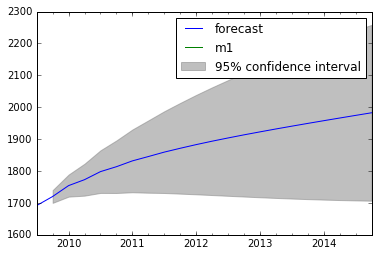

In [28]:
#Note how prediction intervals widen with increasing forecast horizon
results.plot_predict('2009Q3', '2014Q4', dynamic=True,
    plot_insample=True)
plt.show()

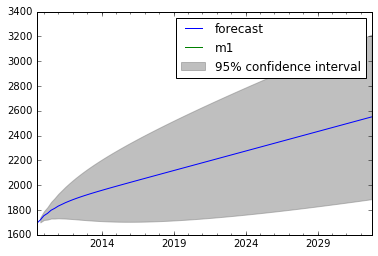

In [29]:
#Weird experiment to see if ARIMA thinks it can forecast too far out
results.plot_predict('2009Q3', '2032Q4', dynamic=True,
    plot_insample=True)
plt.show()

## Workflow step: Evaluate

"Trust, but verify":

*   Check residuals are white noise:
    -   Examine ACF & PACF
    -   Compute portmanteau (Box-Pierce, Box-Ljung) test to see if residuals are correlated
*   Check solver converged!
*   Remember: simple models often outperform fancy models on new data
*   Compare any forecast against the benchmark forecast
    -   Choose a benchmark such as mean or random walk with drift
    -   Fit model on training set and evaluate on test set
    -   To compare multiple forecasts, use a sliding window

## Common metrics

It is common to use several metrics for evaluation:

*   *Root mean squared error*:

$$RMSE \equiv \sqrt{\dfrac{1}{H} \sum{(y_{t+h} - \hat{y}_{t+h|t})^2}}$$

*   *Mean absolute error*:

$$MAE \equiv \dfrac{1}{H} \sum{|y_{t+h} - \hat{y}_{t+h|t}|}$$

*   *Mean absolute percentage error*:

$$MAPE \equiv \dfrac{1}{H} \sum{\left|\dfrac{y_{t+h} - \hat{y}_{t+h|t}}{y_{t+h}}\right|}$$

## Model selection

Use information criterion to evaluate models:

*   Several information criteria exist: AIC, **AICc**, BIC
    -   Essentially, log-likelihood plus penalty for adding parameters
    -   Measures fit vs. parsimony of model
    -   Different criteria have different finite sample properties
*   Choose model with lowest information criterion
*   Especially helpful if you have limited data
*   Popular, pre-ML method, but consider cross-validation if you have enough data

## Tips & Tricks

Some hard won wisdom:

*   Work at the appropriate level of aggregation (grain):
    -   Don't use 5 minute resolution data to forecast at $h$ = one month
*   Don't forecast beyond what the data will support
    -   You should have $4\times h$ amount of data to forecast at horizon $h$
*   Err on the side of simplicity
*   Or, take a machine learning approach:
    -   Try a set of lags and differences plus other predictors
    -   Use regularization and/or variable selection
    -   See Taieb & Hyndman for an approach which uses boosting.

# SARIMA (SARIMAX)
*   ARIMA models may also include seasonal components ...  Specified as ARIMA(p,d,q)(P,D,Q)L  
This is called "seasonal ARIMA" or SARIMA.   

Here, the seasonal lags are as many multiples of L as given by P, D, and Q.

For example, if L = 7 for a daily time series, then P, D, and Q are refer to effects over multiples of weeks, not multiplies of days.  
In this case, p, d, and q are still over multiples of single days.  

**Hint: you'll find this quite useful in your pairs sprint today!**

## ETS vs. ARIMA

ARIMA features & benefits:

*   Benchmark model for almost a century
*   Much easier to estimate with modern computational resources
*   Easy to diagnose models graphically
*   Easy to fit using Box-Jenkins methodology

ETS features & benefits:

*   Can handle non-linear and non-stationary processes
*   Can be computed with limited computational resources
*   Not always a subset of ARIMA
*   Easier to explain to non-technical stakeholders

## Important topics not covered today 
* From here, you can go deeper either in theory/technique or in domain knowledge

* Important theory for **periodic** data:
    - **Fourier analysis** (when lots of periods/cycles are available)
    - **Wavelet** analysis (for fewer or more rapidly changing cycles)   
    
<img alt='<wavelets>', src='images/wavelets.png' width=300px>
    

## Important topics not covered today (II)
* More state space models:
    - So far, we have been trying to model only the internal structure of a single time series $y_t$. In general, we might care about multiple time series $y_{(i, t)}$, which may depend both on each other and on additional time series, such as inputs and hidden "state" series.
    - One popular approach to this is the **Kalman filter**. 
    - At a more basic level, we can generalize ARIMA to "VARIMA" (a vector autoregression model is called "VAR")  
    
* The relation to spatial analysis: just as time has internal structure, so might other continuous features like spatial variables. Some recent research develops a unified framework for these - notably [Cressie & Wikle: Statistics for Spatio-Temporal Data (11)](http://www.wiley.com/WileyCDA/WileyTitle/productCd-EHEP002348.html)  

## Important topics not covered today: domain knowledge

There are many domain-specific ts tools, for example, forecasting tools in economics differ substantially from those in finance.

Other notable ts domains include signal processing, and various clinical sciences

Time series and its practitioners often integrate poorly with other ML specialties. I expect more bridges between the two camps over the next decade. Examples to date include modeling time series through clustering, such as via parametric features or via distance metrics.

Forecasting is integral to the retail sector (e.g. through inventory management and strategies for profit maximization), as well as in behavioral analysis (e.g. embedded in Salesforce, or even A/B testing for web sites.) 

Real life includes constant forecasting, so it is no wonder data science does also.

So even though ts may seem like an isolated subject, you will make frequent use of it - at least implicitly!



##  Summary

You should now be able to answer the following questions:

*   What are the steps in the Box-Jenkins's approach?
*   How much data do I need to forecast at horizon $h$?
*   How should I evaluate a forecast?
*   What are the benefits of ARIMA vs. ETS?